In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, t, gamma, poisson
import scipy.stats

from sympy import integrate, init_printing
import sympy
import math
from sympy.abc import x,y
init_printing(use_latex="mathjax")


## Ej1

0.5638633808516628
0.4361366191483371


[]

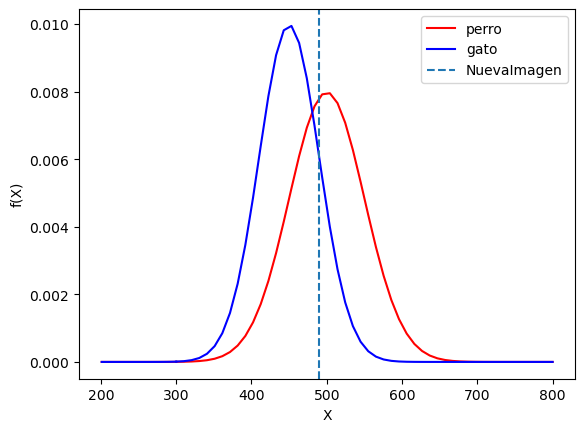

In [2]:
mu1, mu2 = 500, 450
sigma1, sigma2 = 50, 40

perro_marg = 0.5
gato_marg  = 1-perro_marg
perro = norm(mu1, sigma1)
gato  = norm(mu2 ,sigma2)

k = 490

fx = perro_marg*perro.pdf(k) + gato_marg*gato.pdf(k)

p_perro = perro.pdf(k)*perro_marg/fx
p_gato = gato.pdf(k)*gato_marg/fx


print(p_perro)
print(p_gato)

X = np.linspace(min(mu1,mu2) - 3*max(sigma1,sigma2),(max(mu1,mu2) + 6*max(sigma1,sigma2),201))
plt.plot(X, perro.pdf(X), color='r', label='perro')
plt.plot(X, gato.pdf(X), color= 'b', label='gato')
plt.axvline(k, linestyle='--', label='NuevaImagen')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.xlabel("X")
plt.ylabel("f(X)")
plt.plot()

## EJ 2

In [68]:
tc = t.ppf(0.95, df=49)
print('Valor Critico = {:0.3f}'.format(tc))

Valor Critico = 1.677


In [69]:
U = (6.5-6)/(1.5/np.sqrt(50))
print('U = {:0.3f}'.format(U))

U = 2.357


## Ej 3

In [73]:
def funcion(x, a=1, b=1):
        
    f = y**(a+x-1)*sympy.exp(-(b+1)*y)
    integral = integrate(f, (y, 0, np.inf))
    cte = b**a/(math.factorial(a-1)*math.factorial(x))
    result = integral*cte
    return result

10.0
11.142857142857142
11.333333333333334
68


[]

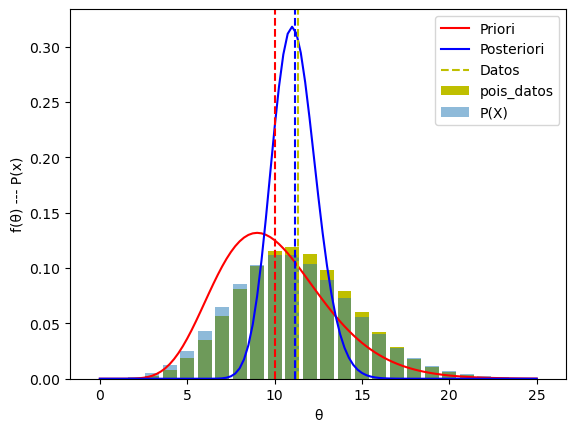

In [123]:
datos = np.array([20, 5, 6, 30, 2, 5])

n = len(datos)
media_datos = datos.mean()
sum_datos = datos.sum()

a1, b1 = 10, 1
a2, b2 = int(sum_datos + a1), int(n + b1)
a3, b3 = 78, 7
media1 = a1/b1
media2 = a2/b2

print(media1)
print(media2)
print(media_datos)
print(sum_datos)


limx = 25

pois_datos = poisson(media_datos)
priori = gamma(a=a1,scale=1/b1)
posteriori = gamma(a=a2,scale=1/b2)
X = np.linspace(0, limx, 101)
plt.plot(X, priori.pdf(X), color='r', label='Priori')
plt.plot(X, posteriori.pdf(X), color='b', label='Posteriori')
plt.bar(X, pois_datos.pmf(X), color='y', label='pois_datos')
# plt.bar(datos, 1, color='y', label='Datos')
plt.axvline(media1, color='r', linestyle='--')
plt.axvline(media2, color='b', linestyle='--')
plt.axvline(media_datos, color='y', linestyle='--', label='Datos')


plt.bar(range(limx),[funcion(i, a2, b2) for i in range(limx)],alpha=.5, label='P(X)')



handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.xlabel("θ")
plt.ylabel("f(θ) --- P(x)")
plt.plot()

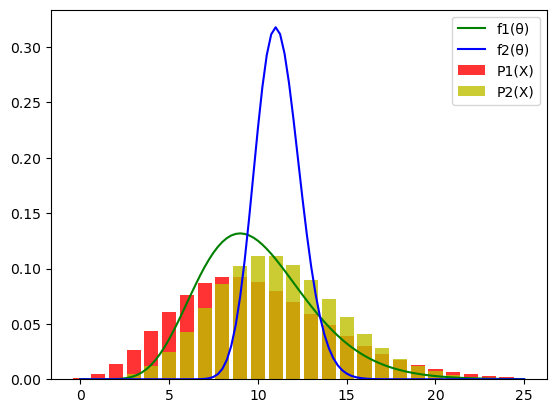

In [124]:
plt.plot(X,priori.pdf(X), color='g', alpha=1, label='f1(θ)')
plt.plot(X,posteriori.pdf(X), color='b', alpha=1, label='f2(θ)')
plt.bar(range(limx),[funcion(i, a1, b1) for i in range(limx)], color='r', alpha=.8, label='P1(X)')
plt.bar(range(limx),[funcion(i, a2, b2) for i in range(limx)], color='y', alpha=.8, label='P2(X)')


plt.legend()

[]

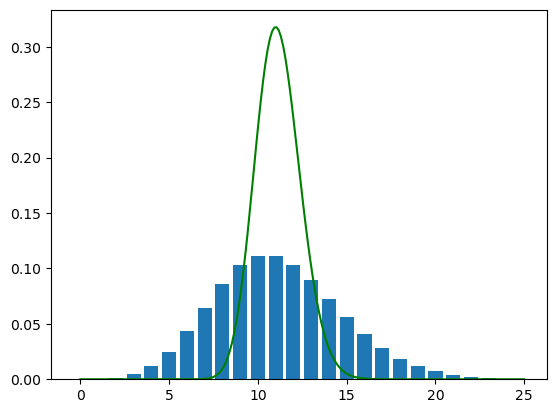

In [94]:
a, b = 78, 7
limx = 25
x = [i for i in range(limx)]
plt.bar(range(limx),[funcion(i, a, b) for i in range(limx)])
posteriori = scipy.stats.gamma(a=a,scale=1/b)
X=np.linspace(0,limx,200)
plt.plot(X, posteriori.pdf(X), color='g', label='l_posteriori')

plt.plot()

### Punto C

In [95]:
a, b = 78, 7
respuesta = 1-sum([funcion(i, a, b) for i in range(31)])
print('P(X > 30 = {:.3e})'.format(respuesta))

P(X > 30 = 5.784e-6)
